In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
import pickle
import os

In [4]:
import scipy

import scipy.constants as sc
hbarc = ( sc.hbar * sc.speed_of_light
         / sc.mega / sc.electron_volt / sc.femto )
ainv = 2.194e3 # lattice cutoff in GeV
lat_unit = hbarc/ainv # lattice spacing in fm

mxi = 0.665 # mass of Xi in lattice unit
mpi = 510/ainv # mass of pion in lattice unit
m_red = 0.5 * mxi # reduced mass

In [5]:
bin_num = 20 # number of jackknife samples

In [6]:
# uncertainties is a useful python library to calculate the propagation of the errors
# pip install uncertainties 
from uncertainties import ufloat

In [7]:
print(np.__version__)
print(scipy.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.14.2
1.0.0
0.8.1
2.2.2


# import data

In [8]:
its = [11, 12, 13, 14, 15, 16]

In [9]:
eigenvals = {}
eigenfuncs_compressed = {}

In [10]:
L = 40
for it in its:
    with open('../data/eigen/eigenfuncs.40.t{}.nev50.pkl'.format(it), 'rb') as fin:
        eigenvals[(L,it)], eigenfuncs_compressed[(L,it)] = pickle.load(fin)

In [11]:
L = 48
for it in its:
    with open('../data/eigen/eigenfuncs.48.t{}.nev75.pkl'.format(it), 'rb') as fin:
        eigenvals[(L,it)], eigenfuncs_compressed[(L,it)] = pickle.load(fin)

In [12]:
L = 64
for it in its:
    with open('../data/eigen/eigenfuncs.64.t{}.nev100.pkl'.format(it), 'rb') as fin:
        eigenvals[(L,it)], eigenfuncs_compressed[(L,it)] = pickle.load(fin)

## convert non-rela. -> rela. energy

In [13]:
conv_rela = lambda E: 2.0*np.sqrt(mxi*E + mxi**2) - 2.0*mxi
for key in eigenvals.keys():
    eigenvals[key] = conv_rela(eigenvals[key])

# summary of eigenvalues

In [14]:
eigenval_avs = {}
eigenval_errs = {}
for it in [11, 12, 13, 14, 15, 16]:
    eigenval_avs[it] = {L: eigenvals[(L,it)].mean(axis=0)
                       for L in [40, 48, 64]}
    eigenval_errs[it] = {L: eigenvals[(L,it)].std(axis=0)*np.sqrt(bin_num - 1)
                        for L in [40, 48, 64]}
    
mode_num = {40: 5, 48: 6, 64: 7}

In [15]:
for L in [40, 48, 64]:
    print(f'L = {L}')
    for it in [11, 12, 13, 14, 15, 16]:
        print('{} '.format(it), end='')
        for av, err in zip(eigenval_avs[it][L], eigenval_errs[it][L]):
            val = ufloat(av, err)*ainv
            print(f'  {val.n:2.1f}({val.s:2.1f})', end='')
            
        print('')

L = 40
11   -4.6(0.9)  77.2(0.7)  161.1(0.7)  237.0(0.7)  307.7(0.9)
12   -5.4(0.9)  76.8(0.9)  160.8(0.8)  235.8(0.8)  306.6(1.0)
13   -5.5(1.0)  77.2(0.8)  161.5(1.0)  236.5(1.1)  306.7(1.1)
14   -5.9(1.2)  78.0(1.5)  161.7(1.7)  237.2(1.7)  305.6(1.6)
15   -4.8(2.5)  76.8(3.4)  158.8(3.6)  237.5(3.8)  306.9(2.9)
16   -3.7(4.1)  72.5(5.9)  154.7(6.3)  235.8(6.3)  306.8(4.2)
L = 48
11   -2.6(0.2)  52.0(0.3)  110.0(0.3)  165.0(0.3)  216.6(0.2)  274.1(0.3)
12   -2.7(0.3)  51.9(0.4)  110.0(0.4)  165.1(0.4)  216.6(0.3)  274.0(0.4)
13   -2.8(0.4)  52.0(0.4)  110.0(0.5)  164.9(0.6)  216.3(0.4)  274.1(0.5)
14   -2.9(0.6)  52.5(0.7)  110.4(0.8)  164.4(0.8)  215.9(0.6)  274.5(0.7)
15   -2.5(0.7)  53.8(0.9)  111.4(1.1)  165.0(1.1)  216.1(0.8)  274.9(1.0)
16   -1.7(1.1)  55.6(1.6)  113.3(1.8)  167.0(1.6)  217.3(1.1)  276.1(1.5)
L = 64
11   -1.0(0.2)  28.5(0.2)  60.5(0.2)  93.6(0.3)  124.5(0.2)  155.9(0.2)  186.7(0.2)
12   -1.2(0.3)  28.5(0.3)  60.5(0.3)  93.4(0.3)  124.3(0.3)  155.9(0.3)  186.7(

In [16]:
maxnum = {40:3, 48:4, 64:6}
print(f'$\Delta E_n$ [MeV] & $L$ & 40 & 48 & 64 \\\\')
print('\hline')
for ith in range(7):
    print(f'$n = {ith}$ ', end='')
    for L in [40, 48, 64]:
        av_vals = []
        if ith > maxnum[L]:
            print(' & ', end='')
            continue
        for it in [13, 14, 15, 16]:
            av_vals.append(eigenval_avs[it][L][ith]*ainv)
            if it == 13:
                av_val = ufloat(eigenval_avs[it][L][ith], eigenval_errs[it][L][ith])*ainv
        print(f' & ${av_val.n:3.1f}({av_val.s:3.1f})\\left(^{{{np.max(av_vals) - av_val.n:+.1f}}}_{{{np.min(av_vals) - av_val.n:.1f}}}\\right)$ ', 
              end='')
    print('\\\\')    


$\Delta E_n$ [MeV] & $L$ & 40 & 48 & 64 \\
\hline
$n = 0$  & $-5.5(1.0)\left(^{+1.8}_{-0.4}\right)$  & $-2.8(0.4)\left(^{+1.1}_{-0.1}\right)$  & $-1.5(0.3)\left(^{+0.4}_{-0.1}\right)$ \\
$n = 1$  & $77.2(0.8)\left(^{+0.8}_{-4.7}\right)$  & $52.0(0.4)\left(^{+3.6}_{0.0}\right)$  & $28.4(0.3)\left(^{+0.4}_{-0.1}\right)$ \\
$n = 2$  & $161.5(1.0)\left(^{+0.2}_{-6.8}\right)$  & $110.0(0.5)\left(^{+3.2}_{0.0}\right)$  & $60.4(0.4)\left(^{+0.3}_{-0.1}\right)$ \\
$n = 3$  & $236.5(1.1)\left(^{+1.0}_{-0.7}\right)$  & $164.9(0.6)\left(^{+2.1}_{-0.5}\right)$  & $93.2(0.4)\left(^{+0.7}_{0.0}\right)$ \\
$n = 4$  &  & $216.3(0.4)\left(^{+1.0}_{-0.4}\right)$  & $124.1(0.3)\left(^{+0.2}_{-0.1}\right)$ \\
$n = 5$  &  &  & $155.8(0.3)\left(^{+0.6}_{-0.0}\right)$ \\
$n = 6$  &  &  & $186.5(0.3)\left(^{+0.8}_{0.0}\right)$ \\


# plot eigenfunctions

In [17]:
mkdir -p ../figs/eigenfuncs

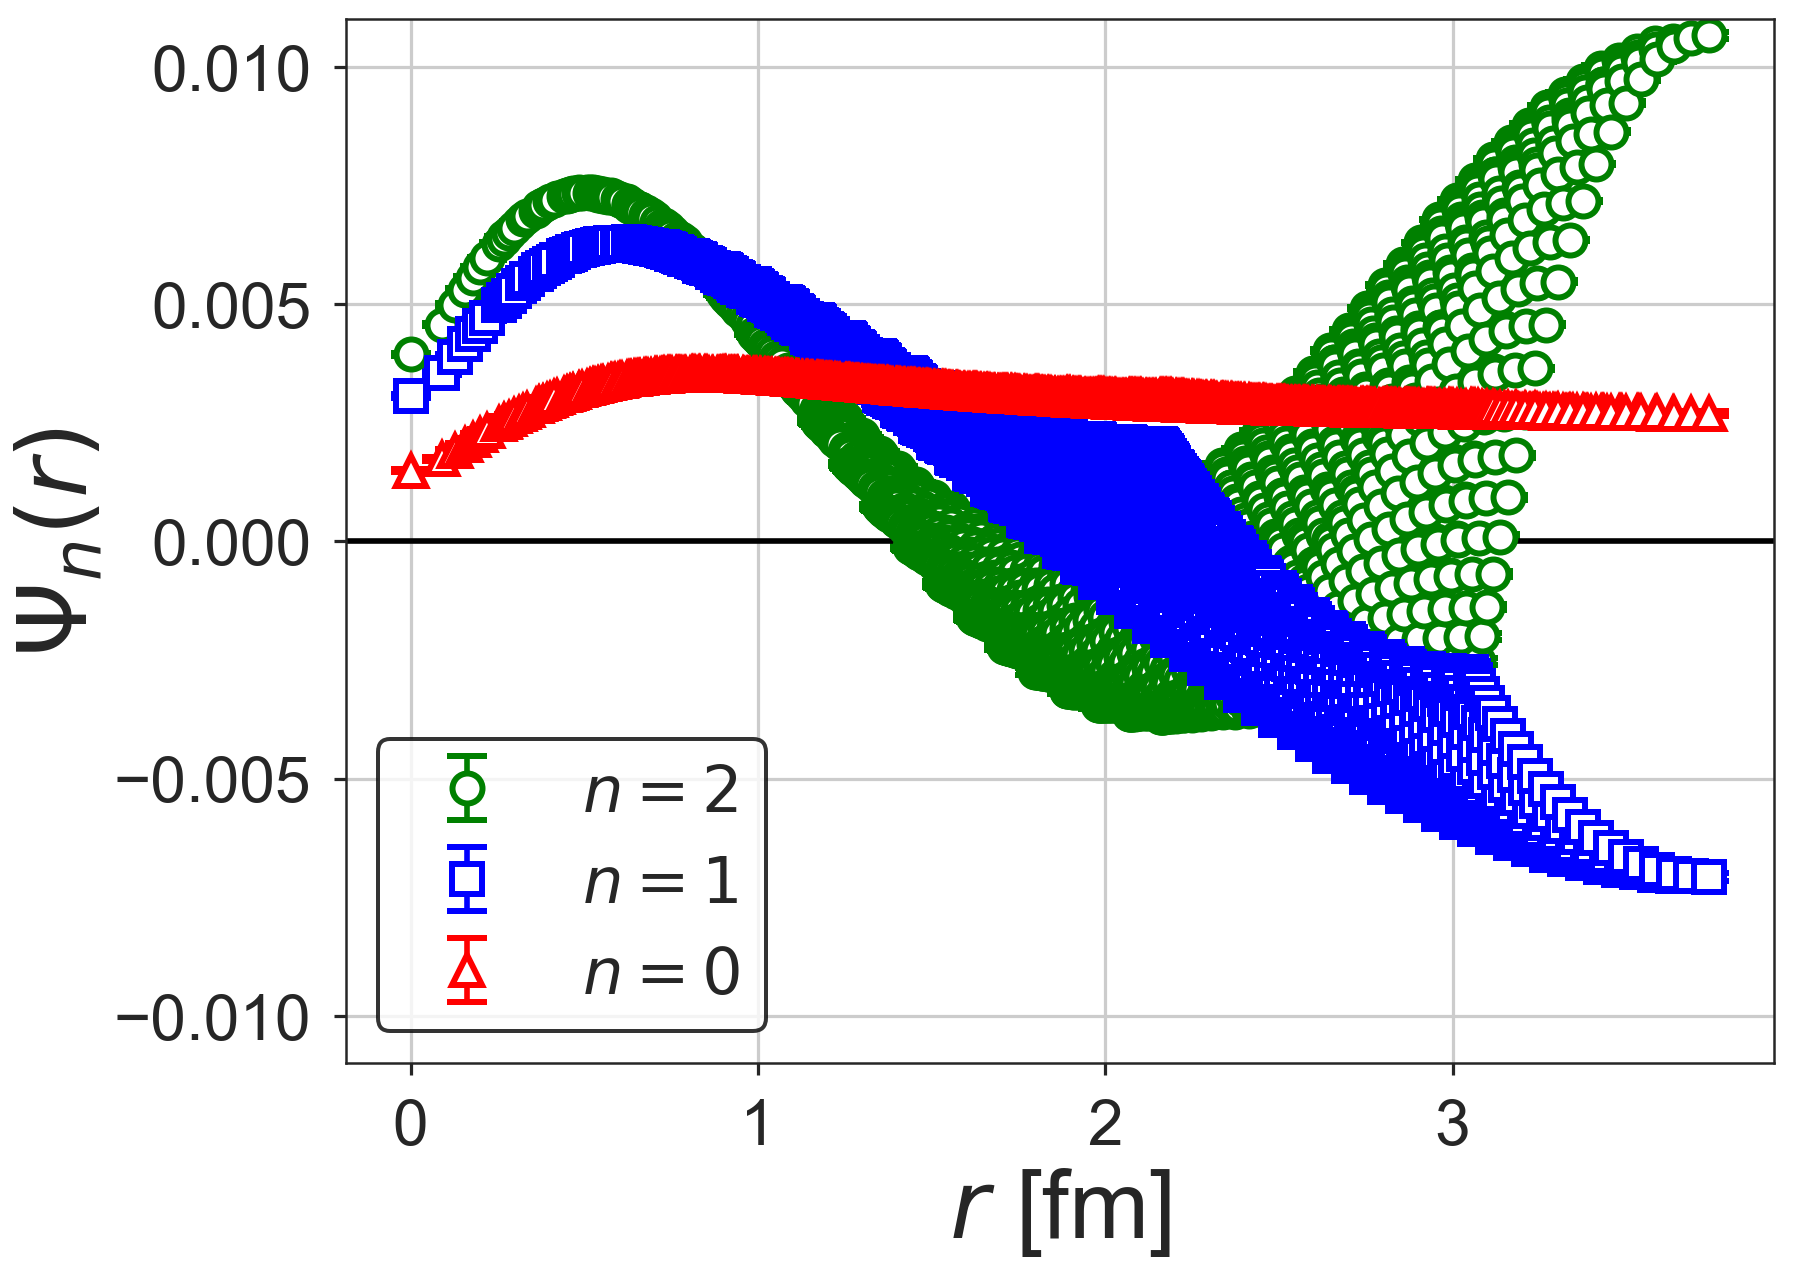

In [18]:
it = 13
Ns = 48
fig, ax = plt.subplots()
rs = np.array([np.sqrt(x**2+y**2+z**2)
              for z in range(-Ns//2,Ns//2)
              for y in range(-Ns//2,Ns//2)
              for x in range(-Ns//2,Ns//2)]).reshape(Ns,Ns,Ns)
rs = np.roll(np.roll(np.roll(rs,Ns//2,0),Ns//2,1),Ns//2,2).flatten()
uniq = np.array([ix + Ns*(iy+Ns*iz)
                for iz in range(0,Ns//2+1)
                for iy in range(0,iz+1)
                for ix in range(0,iy+1)])
for nth, col, sym in zip([0, 1, 2][::-1], ['red', 'blue', 'green'][::-1], 
                         ['^', 's', 'o'][::-1]):
    fac = 1.0 #np.sqrt(Ns**3)
    ax.errorbar(rs[uniq]*lat_unit, eigenfuncs_compressed[(Ns,it)][:,:,nth].mean(axis=0)*fac,
       eigenfuncs_compressed[(Ns,it)][:,:,nth].std(axis=0)*fac*np.sqrt(bin_num - 1),
           fmt=sym, color=col, ms=15, mew=3.0, mfc='white', 
            mec=col, capsize=10, capthick=2.0, label=r'$n = {}$'.format(nth))

ax.set_ylabel(r'$\Psi_n(r)$', size=48)
ax.set_xlabel(r'$r$ [fm]', size=48)
ax.axhline(0, color='black')
hh, ll = ax.get_legend_handles_labels()
ax.set_ylim(-0.011, 0.011)
leg = ax.legend(loc='lower left', frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
fig.savefig('../figs/eigenfuncs/psi_L{}_t{:03}_n0_2.png'.format(Ns, it), bbox_inches='tight')


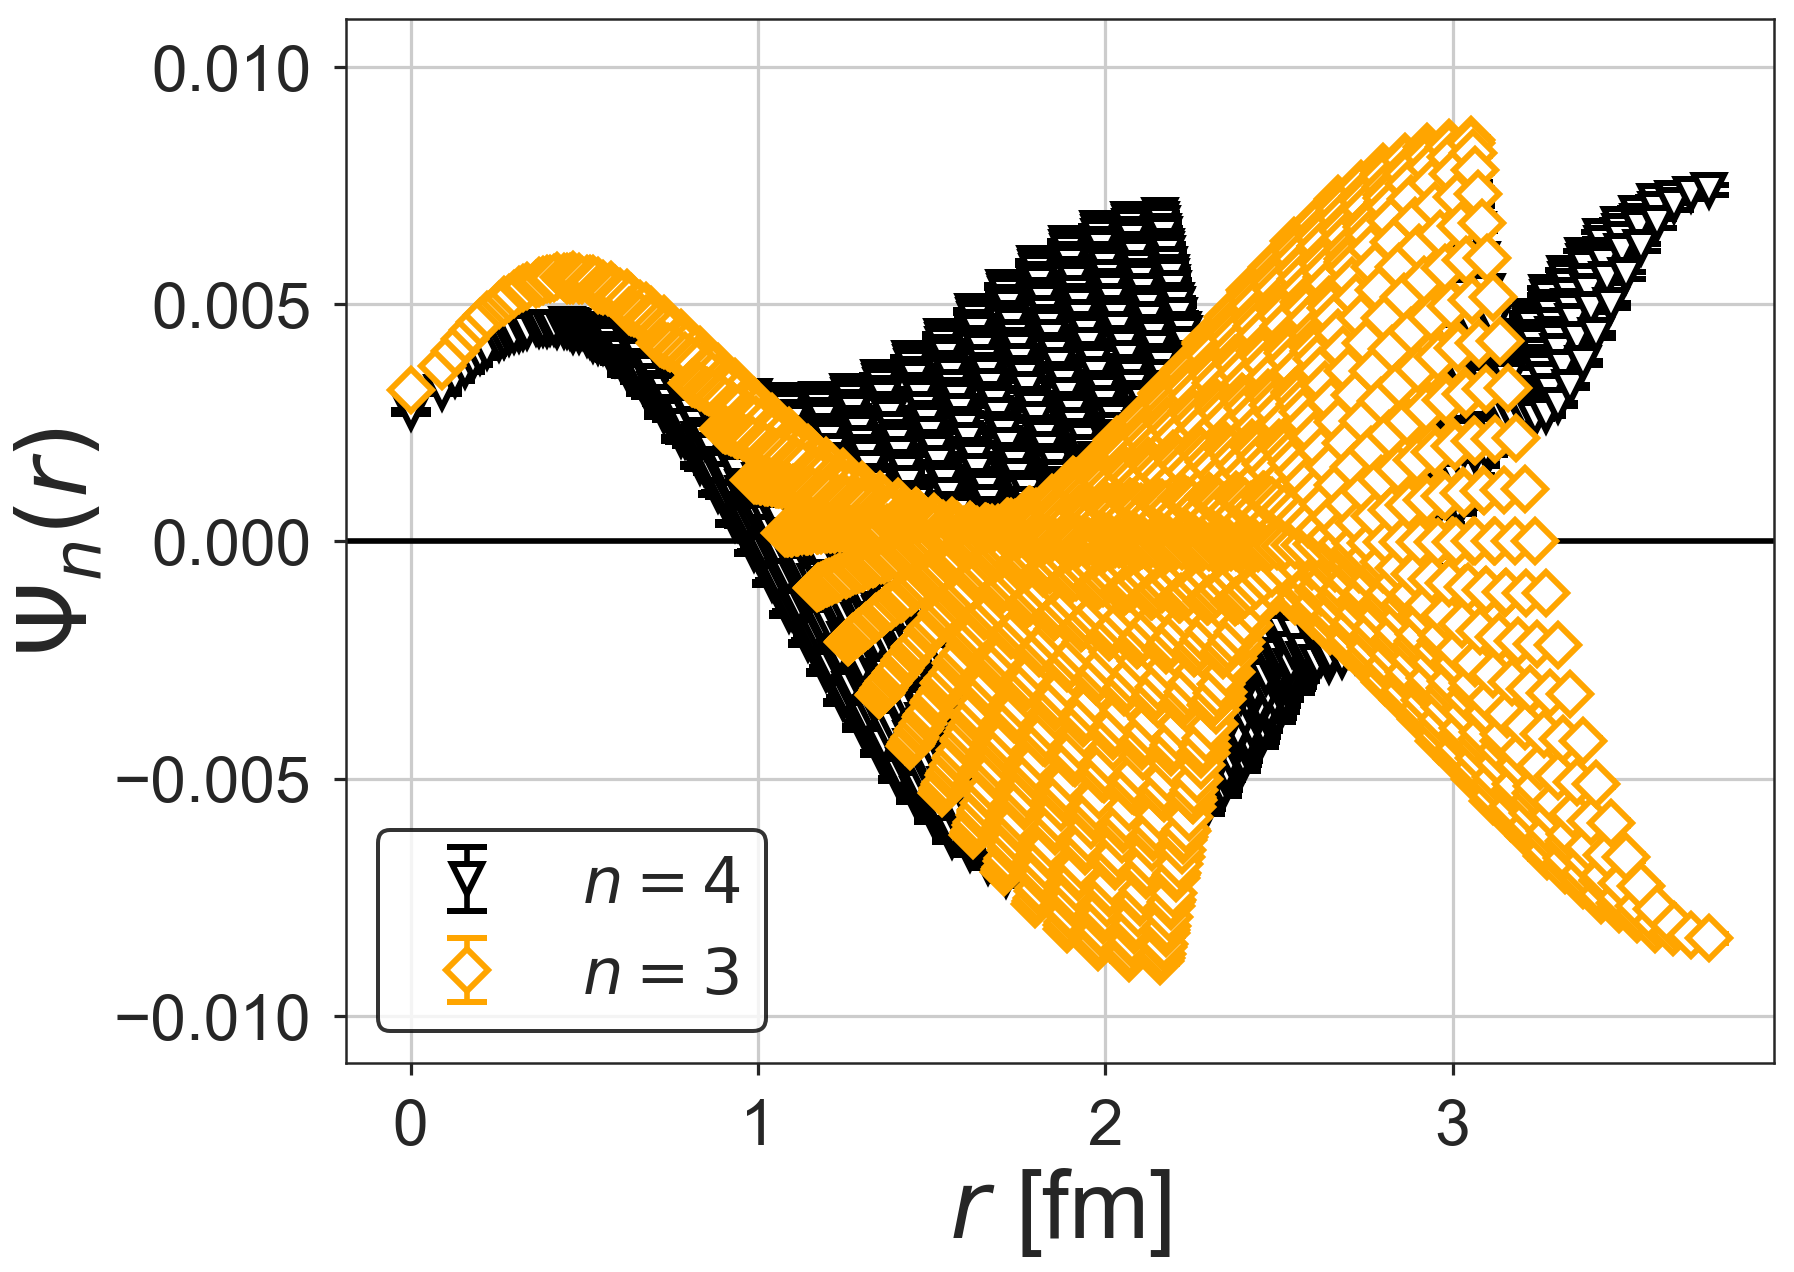

In [19]:
it = 13
Ns = 48
fig, ax = plt.subplots()
rs = np.array([np.sqrt(x**2+y**2+z**2)
              for z in range(-Ns//2,Ns//2)
              for y in range(-Ns//2,Ns//2)
              for x in range(-Ns//2,Ns//2)]).reshape(Ns,Ns,Ns)
rs = np.roll(np.roll(np.roll(rs,Ns//2,0),Ns//2,1),Ns//2,2).flatten()
uniq = np.array([ix + Ns*(iy+Ns*iz)
                for iz in range(0,Ns//2+1)
                for iy in range(0,iz+1)
                for ix in range(0,iy+1)])
for nth, col, sym in zip([3, 4][::-1], ['orange', 'black'][::-1], 
                         ['D', 'v'][::-1]):
    fac = 1.0 #np.sqrt(Ns**3)
    ax.errorbar(rs[uniq]*lat_unit, eigenfuncs_compressed[(Ns,it)][:,:,nth].mean(axis=0)*fac,
       eigenfuncs_compressed[(Ns,it)][:,:,nth].std(axis=0)*fac*np.sqrt(bin_num - 1),
           fmt=sym, color=col, ms=15, mew=3.0, mfc='white', 
            mec=col, capsize=10, capthick=2.0, label=r'$n = {}$'.format(nth))

ax.set_ylabel(r'$\Psi_n(r)$', size=48)
ax.set_xlabel(r'$r$ [fm]', size=48)
ax.axhline(0, color='black')
hh, ll = ax.get_legend_handles_labels()
ax.set_ylim(-0.011, 0.011)
leg = ax.legend(loc='lower left', frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
fig.savefig('../figs/eigenfuncs/psi_L{}_t{:03}_n3_4.png'.format(Ns, it), bbox_inches='tight')


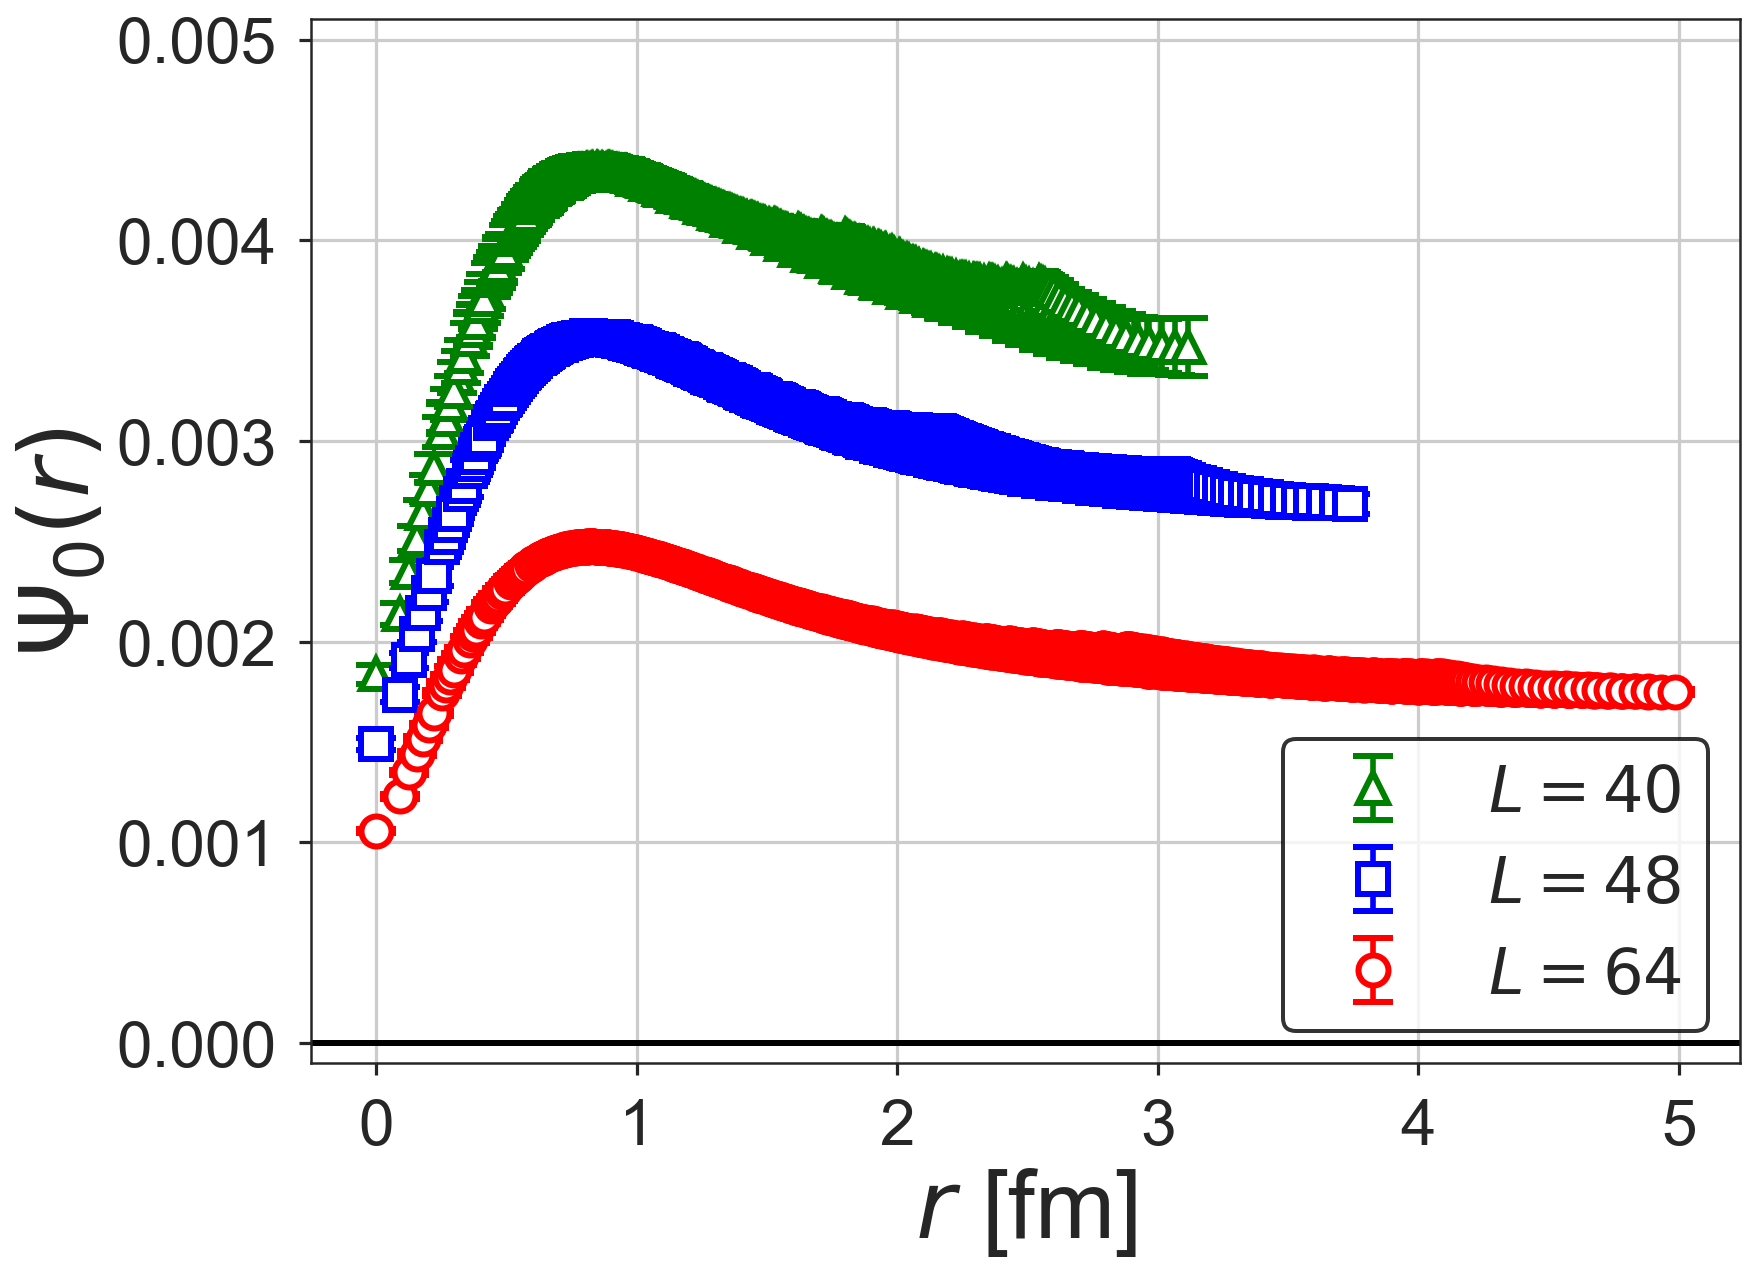

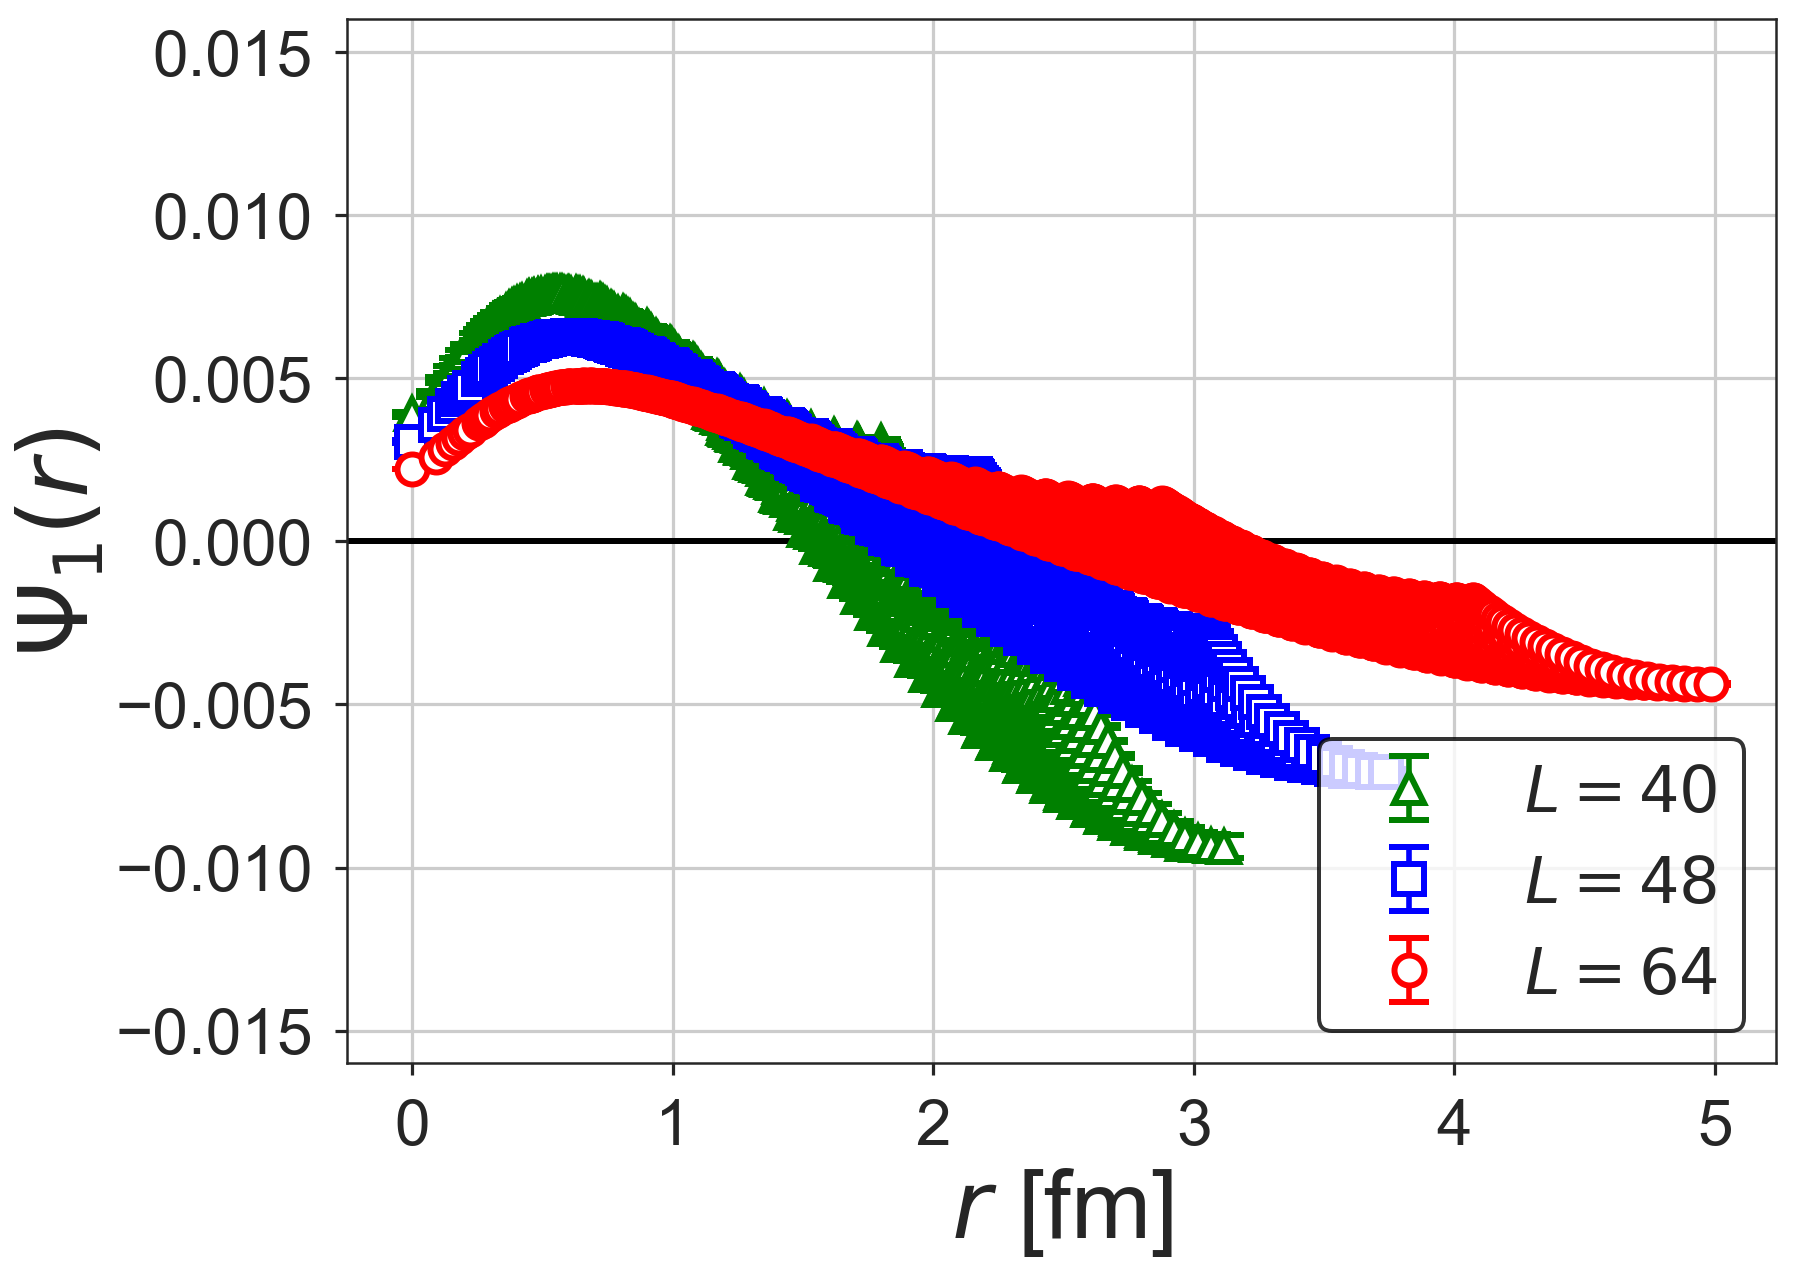

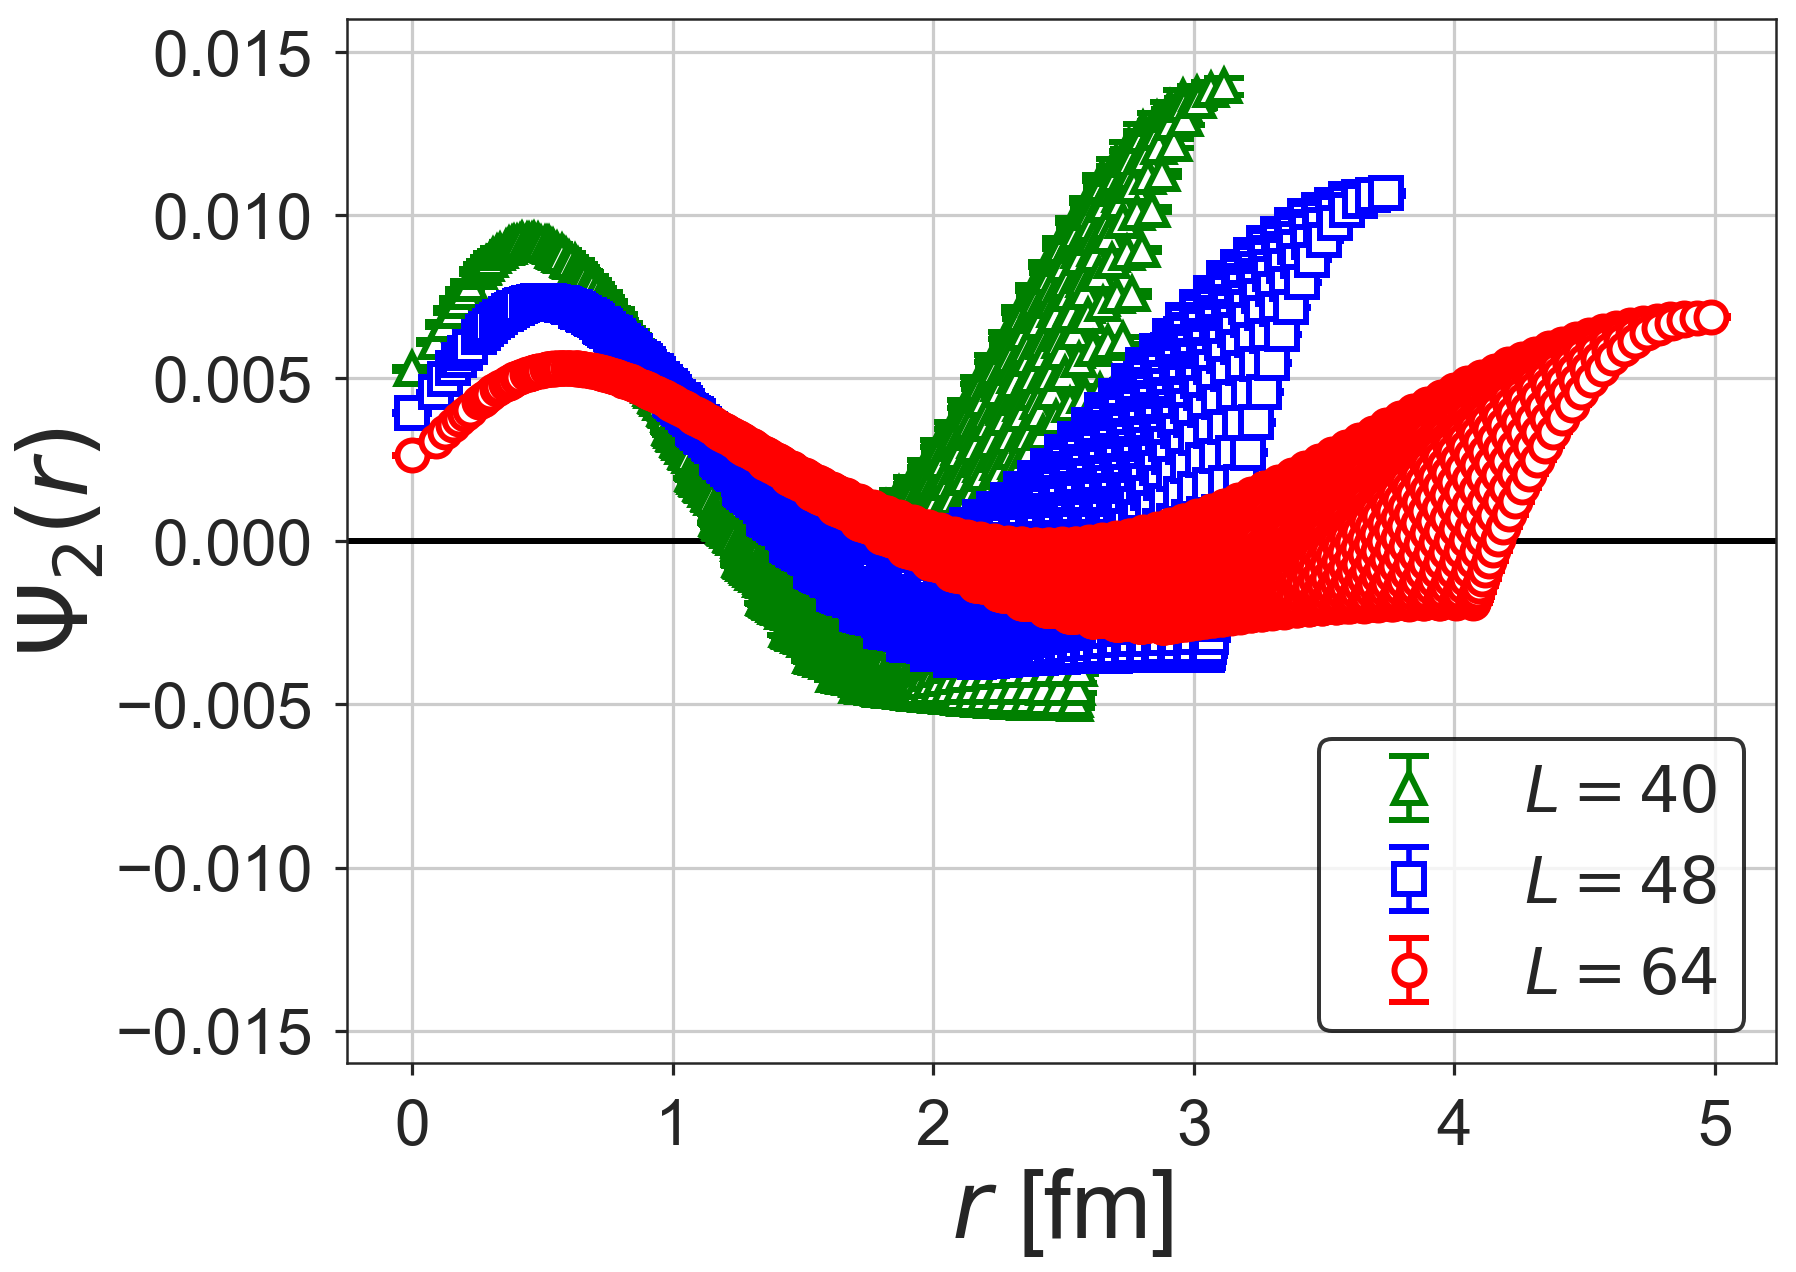

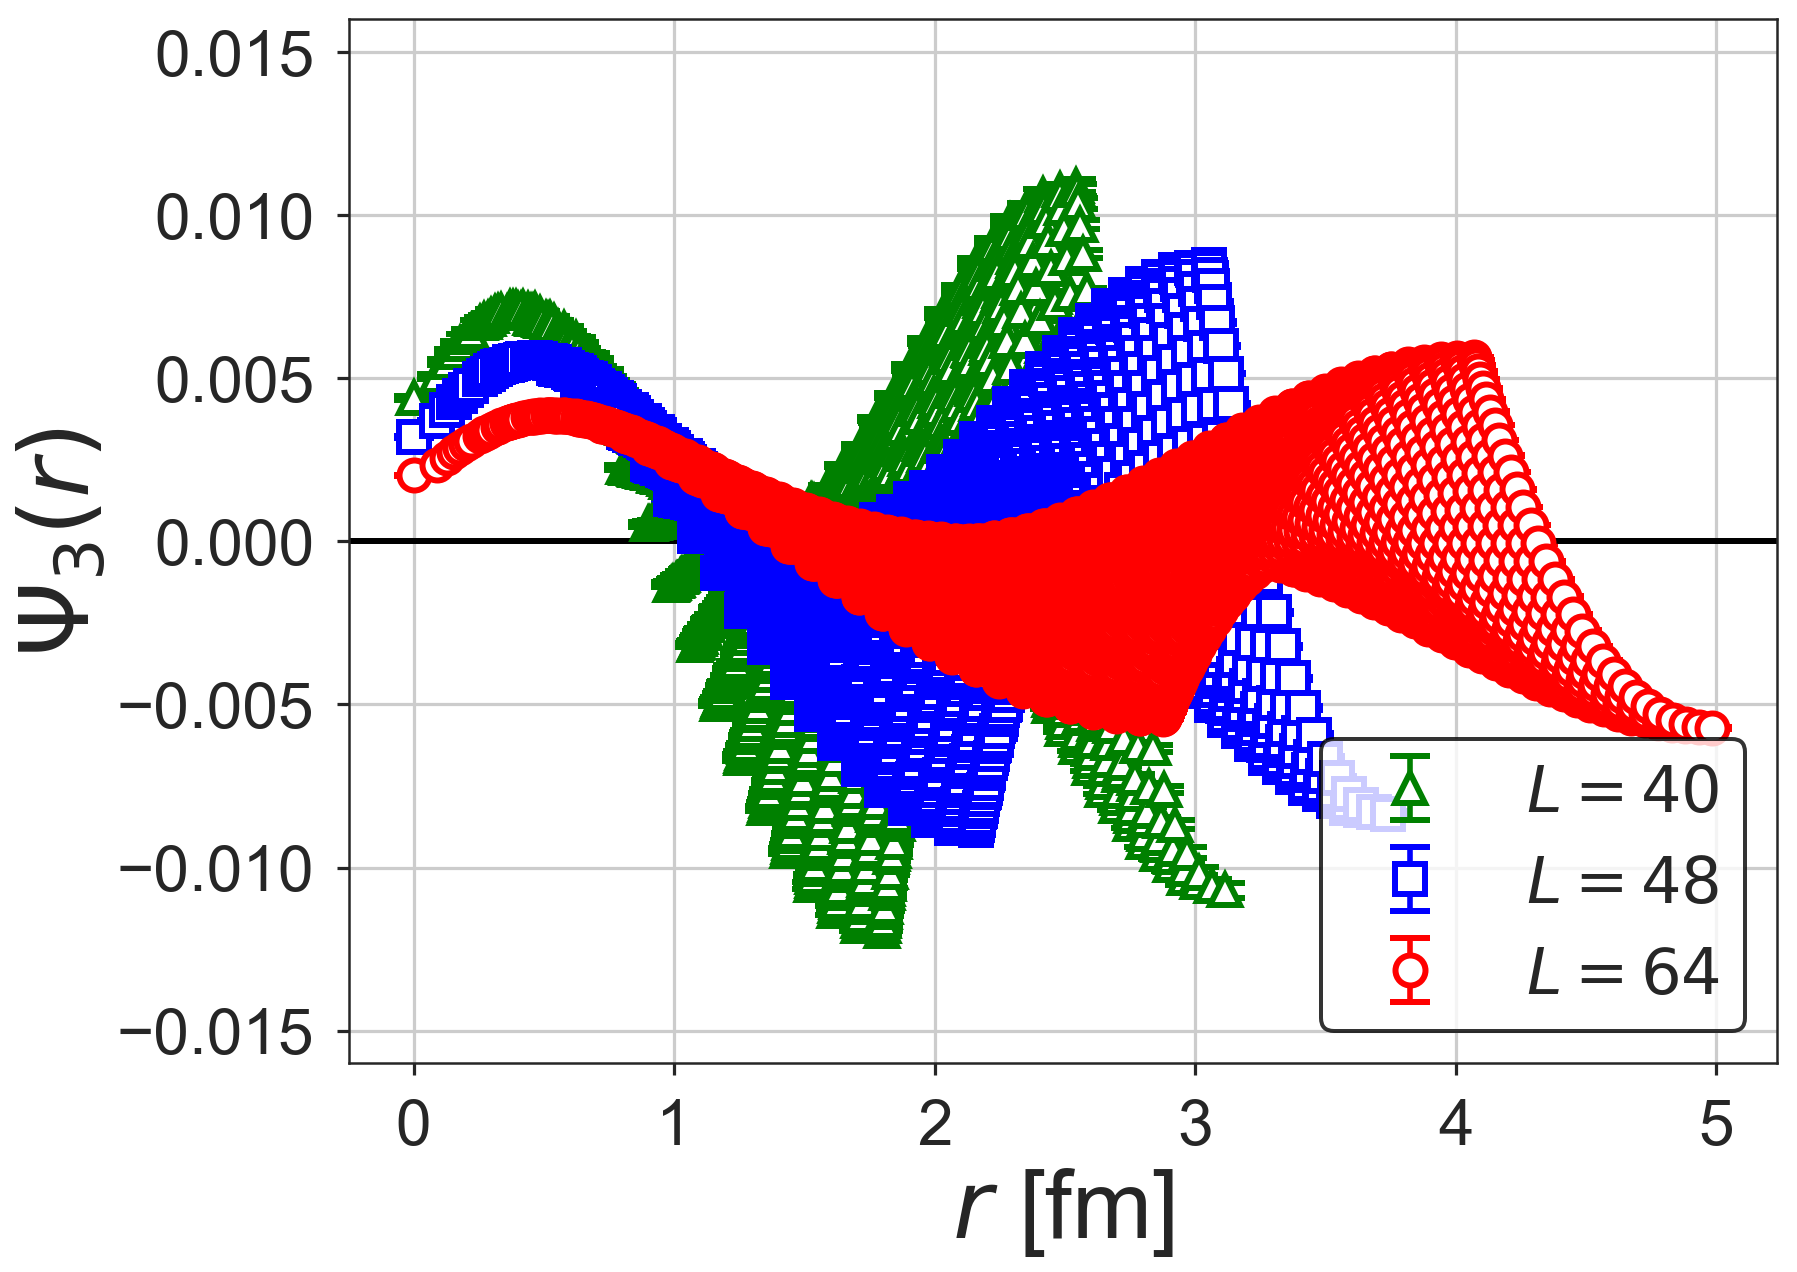

In [20]:
def plot_eigenfunc(nth, it):
    fig, ax = plt.subplots()
    for Ns, col, sym in zip([40, 48, 64], ['green', 'blue', 'red'], ['^', 's', 'o']):
        rs = np.array([np.sqrt(x**2+y**2+z**2)
                      for z in range(-Ns//2,Ns//2)
                      for y in range(-Ns//2,Ns//2)
                      for x in range(-Ns//2,Ns//2)]).reshape(Ns,Ns,Ns)
        rs = np.roll(np.roll(np.roll(rs,Ns//2,0),Ns//2,1),Ns//2,2).flatten()
        uniq = np.array([ix + Ns*(iy+Ns*iz)
                        for iz in range(0,Ns//2+1)
                        for iy in range(0,iz+1)
                        for ix in range(0,iy+1)])
        fac = 1.0 #np.sqrt(Ns**3)
        ax.errorbar(rs[uniq]*lat_unit, eigenfuncs_compressed[(Ns,it)][:,:,nth].mean(axis=0)*fac,
               eigenfuncs_compressed[(Ns,it)][:,:,nth].std(axis=0)*fac*np.sqrt(bin_num - 1),
                   fmt=sym, color=col, ms=15, mew=3.0, mfc='white',
                    mec=col, capsize=10, capthick=2.0, label=r'$L = {}$'.format(Ns))
        
        ax.set_ylabel(r'$\Psi_{}(r)$'.format(nth, it), size=48)
        ax.set_xlabel(r'$r$ [fm]', size=48)
        ax.axhline(0, color='black')
        hh, ll = ax.get_legend_handles_labels()
        ax.set_ylim(-0.016, 0.016)
        if nth == 0:
            ax.set_ylim(-0.0001, 0.0051)
        leg = ax.legend(hh, ll, loc='lower right', frameon=True)
        leg.get_frame().set_edgecolor('black')
        leg.get_frame().set_linewidth(2.0)
        fig.savefig('../figs/eigenfuncs/psi_{}_t{:03}.png'.format(ith, it), bbox_inches='tight')
for ith in [0, 1, 2, 3]:
    plot_eigenfunc(ith, 13)